# Task : Predict customer churn

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"data/Churn_Modelling.csv")

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset["CustomerId"].nunique()#All customers are unique

10000

In [5]:
dataset.shape

(10000, 14)

### Missing Values

In [6]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)

In [9]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
dataset["Geography"].unique()#Nominal

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
dataset["Gender"].unique()#Nominal

array(['Female', 'Male'], dtype=object)

### One Hot Encoding

In [12]:
dataset = pd.get_dummies(dataset,columns=["Geography","Gender"],drop_first=True)

In [13]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
dataset.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

C:\Users\7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

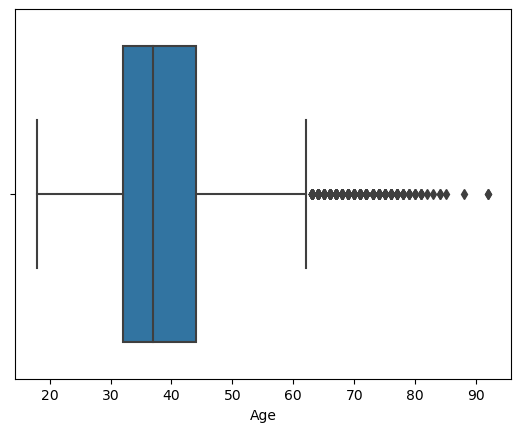

In [15]:
sns.boxplot(dataset["Age"])

#### Split the Independent and Dependent variables

In [16]:
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


In [17]:
#Independent variables
X = dataset.drop("Exited",axis = 1)

In [18]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [19]:
type(X)

pandas.core.frame.DataFrame

In [20]:
X.shape

(10000, 11)

In [21]:
y = dataset["Exited"]

In [22]:
y.shape

(10000,)

In [23]:
X.shape

(10000, 11)

### Split the data into train and test set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#20% --Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [26]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [27]:
X_train.shape

(8000, 11)

In [28]:
X_test.shape

(2000, 11)

In [29]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


### Scaling or Standardization or Normalization

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()#Creatin the object

In [32]:
#fit -- To apply the formula
#transform -- 
X_train = sc.fit_transform(X_train)

In [33]:
X_test = sc.transform(X_test)

In [34]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [35]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [36]:
#0 - Not exited
#1-- Exited
y_train.unique()

array([0, 1], dtype=int64)

### Building the  NN Architecture

In [37]:
import tensorflow

In [38]:
tensorflow.__version__

'2.14.0'

In [39]:
#Sequential -- init the Neural network model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input

##### Init the Neural Network model

In [40]:
nn_model = Sequential()

In [41]:
X_train.shape

(8000, 11)

###### Add input layer

In [42]:
X_train.shape[1]

11

In [43]:
#shape -- shape of input, no of neurons in input layer
inp_layer = Input(shape = (X_train.shape[1],) )

In [44]:
nn_model.add(inp_layer)

### Add Hidden layer

In [45]:
#units -- no of neurons in hidden layer
# kernel -- weights -- kernel_initializer -- strategy to init the weights
#activation -- the activation function for this layer
hidden_layer = Dense(units = 6, kernel_initializer = "random_uniform", activation = "relu", bias_initializer = "random_uniform")

In [46]:
nn_model.add(hidden_layer)

### Add Output layer

In [47]:
#units -- no of neurons in output layer
# kernel -- weights -- kernel_initializer -- strategy to init the weights
#activation -- the activation function for this layer
output_layer = Dense(units = 1, kernel_initializer = "random_uniform", activation = "sigmoid", bias_initializer = "random_uniform")

In [48]:
nn_model.add(output_layer)

In [49]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
from tensorflow.keras.utils import plot_model

In [51]:
plot_model(nn_model, show_shapes=True, show_dtype=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [52]:
np.__version__

'1.24.4'

##### Compile the model

In [53]:
from tensorflow.keras.optimizers import SGD

In [54]:
sgd_o = SGD(learning_rate=0.01)

In [55]:
#compile
#mention the strategies for back-propagation

#loss -- loss calculating statergy
#optimizer -- weight updatation statergy
#metrics -- to compute model performace for eachepoch
nn_model.compile(loss = "binary_crossentropy", optimizer = sgd_o, metrics = ["accuracy"])

#### Train the model

In [56]:
len(X_train) / 32

250.0

In [57]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
#epochs no of iterations
#batch_size-- for how may observations we want to update the weights -- batch processing
history = nn_model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.6206 - accuracy: 0.7825
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5458 - accuracy: 0.7945
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5216 - accuracy: 0.7945
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5126 - accuracy: 0.7945
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.7945
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5062 - accuracy: 0.7945
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5040 - accuracy: 0.7945
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5016 - accuracy: 0.7945
Epoch 9/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4984 - accuracy: 0.7945
Epoch 10/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4944 - accuracy: 0.7945

In [59]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [60]:
loss_data = history.history["loss"]

In [61]:
loss_data

[0.6205571293830872,
 0.5458223819732666,
 0.5216487646102905,
 0.5126062631607056,
 0.5086023211479187,
 0.5061777830123901,
 0.5040463805198669,
 0.5015929937362671,
 0.4984259009361267,
 0.4943825304508209,
 0.4894307255744934,
 0.4837615191936493,
 0.4776664972305298,
 0.4714881479740143,
 0.46558675169944763,
 0.4601515233516693,
 0.4553404450416565,
 0.4511815011501312,
 0.44764038920402527,
 0.44464313983917236,
 0.44211864471435547,
 0.4399934709072113,
 0.438180148601532,
 0.43661144375801086,
 0.4352247416973114,
 0.4339245557785034,
 0.43271902203559875,
 0.4314412772655487,
 0.43023455142974854,
 0.428948312997818,
 0.42755863070487976,
 0.42611953616142273,
 0.42447271943092346,
 0.42270350456237793,
 0.4208434820175171,
 0.418813556432724,
 0.4167096018791199,
 0.41446369886398315,
 0.4122244715690613,
 0.4098765254020691,
 0.40754368901252747,
 0.40523695945739746,
 0.4029419422149658,
 0.4007202386856079,
 0.39859330654144287,
 0.3966001570224762,
 0.3947097361087799,
 

In [62]:
len(loss_data)

50

In [63]:
epochs = range(1,len(loss_data)+1)

In [64]:
len(loss_data)+1

51

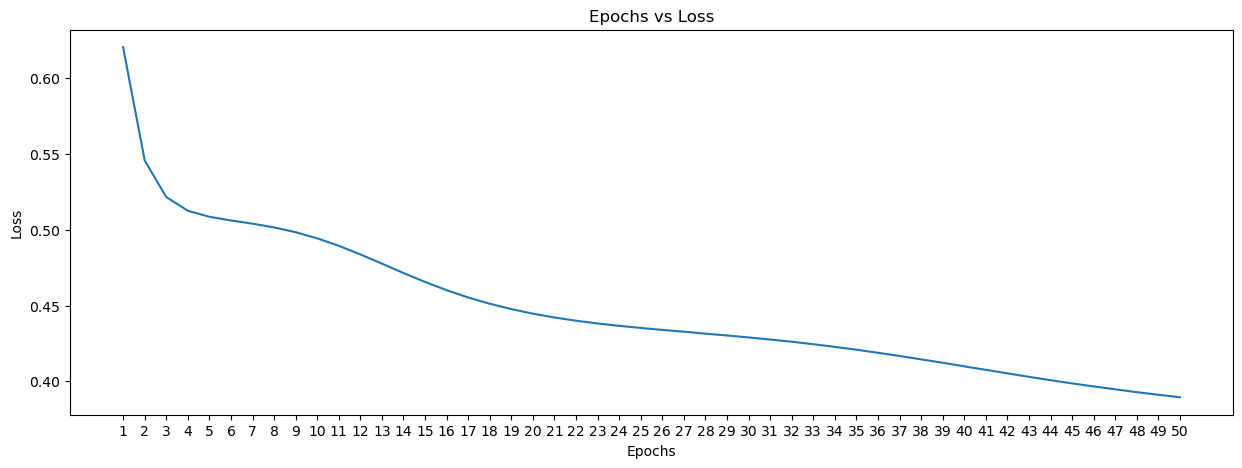

In [65]:
plt.figure(figsize=(15,5))
plt.plot(epochs, loss_data)
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.show()

In [66]:
accuracy_data = history.history["accuracy"]

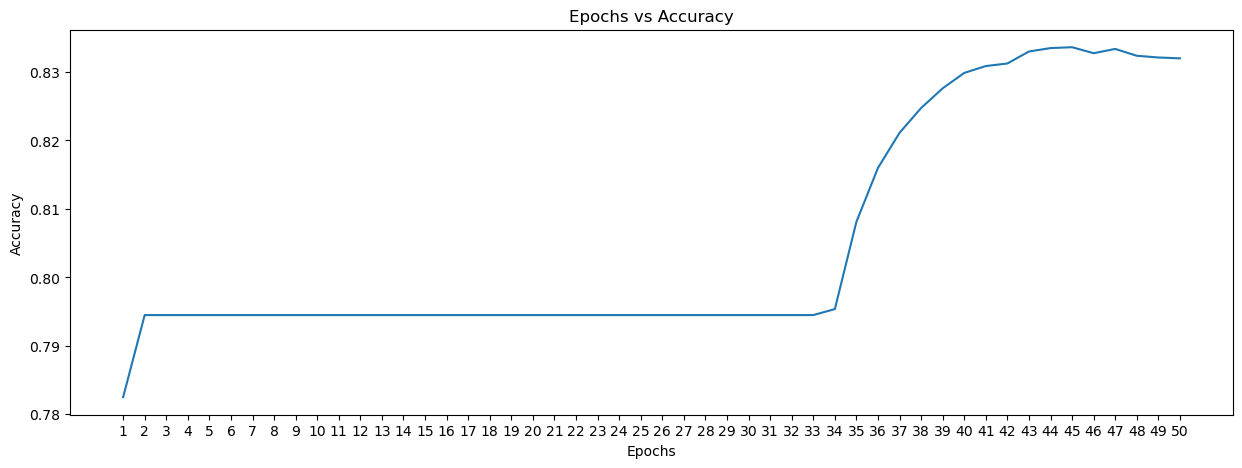

In [67]:
plt.figure(figsize=(15,5))
plt.plot(epochs, accuracy_data)
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.show()

### Evaluation

In [68]:
#prediction

In [69]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [70]:
len(X_test) / 32

62.5

In [71]:
y_pred = nn_model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [72]:
y_pred

array([[0.09729539],
       [0.08773473],
       [0.32850313],
       ...,
       [0.56304735],
       [0.08899572],
       [0.26016763]], dtype=float32)

In [73]:
y_pred = y_pred > 0.5

In [74]:
y_pred = y_pred.astype("int")

In [75]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [76]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
print("Test accuracy ::",accuracy_score(y_test, y_pred)*100,"%")

Test accuracy :: 83.75 %


In [79]:
from mlxtend.plotting import plot_confusion_matrix

In [80]:
cm_test = confusion_matrix(y_test, y_pred)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

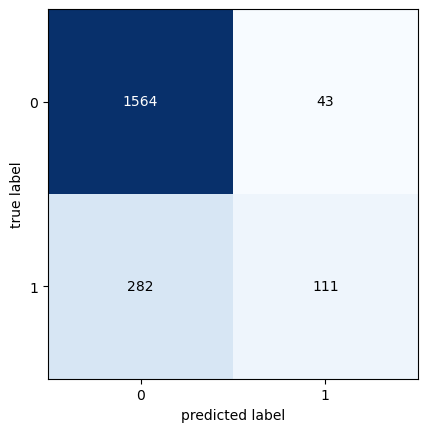

In [81]:
plot_confusion_matrix(cm_test)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1607
           1       0.72      0.28      0.41       393

    accuracy                           0.84      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.84      0.81      2000



### Real time prediction

In [83]:
data = list(X.iloc[100,:])

In [84]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [85]:
data

[665.0, 40.0, 6.0, 0.0, 1.0, 1.0, 1.0, 161848.03, 0.0, 0.0, 0.0]

In [86]:
data = np.array([data])

In [87]:
data

array([[6.6500000e+02, 4.0000000e+01, 6.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.6184803e+05,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00]])

In [88]:
data = sc.transform(data)

C:\Users\7240\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [89]:
nn_model.predict(data) > 0.5

1/1 [==============================] - 0s 35ms/step


array([[False]])

### Save the model

In [90]:
#nn_model--trained

In [91]:
nn_model.save("churn_prediction.h5")

C:\Users\7240\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Save the scaler object

In [92]:
import joblib

In [93]:
joblib.dump(sc,"churn_sc.pkl")

['churn_sc.pkl']